<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Wrangling-with-Pandas" data-toc-modified-id="Data-Wrangling-with-Pandas-1">Data Wrangling with Pandas</a></span><ul class="toc-item"><li><span><a href="#Date/Time-data-handling" data-toc-modified-id="Date/Time-data-handling-1.1">Date/Time data handling</a></span></li><li><span><a href="#Merging-and-joining-DataFrame-objects" data-toc-modified-id="Merging-and-joining-DataFrame-objects-1.2">Merging and joining DataFrame objects</a></span><ul class="toc-item"><li><span><a href="#Exercise-6" data-toc-modified-id="Exercise-6-1.2.1">Exercise 6</a></span></li></ul></li><li><span><a href="#Concatenation" data-toc-modified-id="Concatenation-1.3">Concatenation</a></span></li><li><span><a href="#Reshaping-DataFrame-objects" data-toc-modified-id="Reshaping-DataFrame-objects-1.4">Reshaping DataFrame objects</a></span></li><li><span><a href="#Pivoting" data-toc-modified-id="Pivoting-1.5">Pivoting</a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-1.6">Data transformation</a></span><ul class="toc-item"><li><span><a href="#Dealing-with-duplicates" data-toc-modified-id="Dealing-with-duplicates-1.6.1">Dealing with duplicates</a></span></li><li><span><a href="#Value-replacement" data-toc-modified-id="Value-replacement-1.6.2">Value replacement</a></span></li><li><span><a href="#Inidcator-variables" data-toc-modified-id="Inidcator-variables-1.6.3">Inidcator variables</a></span></li></ul></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-1.7">Categorical Data</a></span><ul class="toc-item"><li><span><a href="#Discretization" data-toc-modified-id="Discretization-1.7.1">Discretization</a></span></li><li><span><a href="#Permutation-and-sampling" data-toc-modified-id="Permutation-and-sampling-1.7.2">Permutation and sampling</a></span></li></ul></li><li><span><a href="#Data-aggregation-and-GroupBy-operations" data-toc-modified-id="Data-aggregation-and-GroupBy-operations-1.8">Data aggregation and GroupBy operations</a></span><ul class="toc-item"><li><span><a href="#Apply" data-toc-modified-id="Apply-1.8.1">Apply</a></span></li></ul></li><li><span><a href="#References" data-toc-modified-id="References-1.9">References</a></span></li></ul></li></ul></div>

# Data Wrangling with Pandas

Now that we have been exposed to the basic functionality of Pandas, let's explore some more advanced features that will be useful when addressing more complex data management tasks.

As most statisticians/data analysts will admit, often the lion's share of the time spent implementing an analysis is devoted to preparing the data itself, rather than to coding or running a particular model that uses the data. This is where Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.


In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

## Date/Time data handling

Date and time data are inherently problematic. There are an unequal number of days in every month, an unequal number of days in a year (due to leap years), and time zones that vary over space. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

The `datetime` built-in library handles temporal information down to the nanosecond.

In [2]:
from datetime import datetime, date, time

In [3]:
now = datetime.now()
now

datetime.datetime(2023, 10, 6, 17, 53, 30, 442169)

In [4]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times:

In [10]:
my_age = now - datetime(1970, 1, 1)
my_age.days/365

53.797260273972604

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [2]:
segments = pd.read_csv("Data/transit_segments.csv")
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In [9]:
segments.seg_length.describe()

count    262526.000000
mean         25.471641
std          30.935236
min           1.000000
25%          19.000000
50%          21.800000
75%          27.300000
max        1882.000000
Name: seg_length, dtype: float64

For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram:

<Axes: >

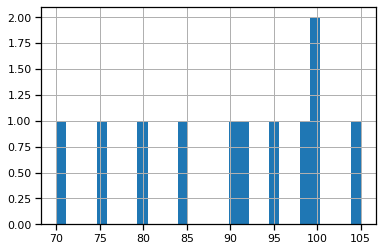

In [41]:
# an example of using bins
# Create a DataFrame with exam scores
data = {'Scores': [70, 75, 80, 85, 90, 92, 95, 98, 100, 100, 105]}
df = pd.DataFrame(data)

# Create a histogram with 5 bins
df['Scores'].hist(bins=30)

<Axes: >

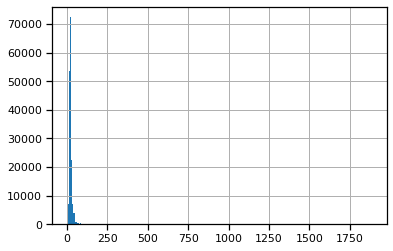

In [44]:
segments.seg_length.hist(bins=500)

Though most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful:

<Axes: >

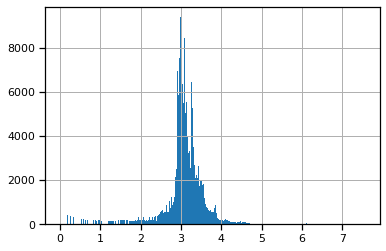

In [43]:
segments.seg_length.apply(np.log).hist(bins=500)

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [50]:
datetime.strptime(segments.st_time.iloc[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

In [46]:
segments.iloc[0].st_time

'2/10/09 16:03'

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [3]:
from dateutil.parser import parse

In [51]:
parse(segments.st_time.iloc[0])

datetime.datetime(2009, 2, 10, 16, 3)

We can convert all the dates in a particular column by using the `apply` method.

In [12]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M')).head(10)

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire `Series` of formatted strings into `datetime` objects.

In [52]:
pd.to_datetime(segments.st_time[:10], format='%m/%d/%y %H:%M')

0   2009-02-10 16:03:00
1   2009-04-06 14:31:00
2   2009-04-06 14:36:00
3   2009-04-10 17:58:00
4   2009-04-10 17:59:00
5   2010-03-20 16:06:00
6   2010-03-20 18:05:00
7   2011-05-04 11:28:00
8   2010-06-05 11:23:00
9   2010-06-08 11:03:00
Name: st_time, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [53]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

The `read_*` functions now have an optional `parse_dates` argument that try to convert any columns passed to it into `datetime` format upon import:

In [3]:
segments = pd.read_csv("Data/transit_segments.csv", parse_dates=['st_time', 'end_time'], date_format='%m/%d/%y %H:%M', nrows=1000)

In [8]:
segments.st_time

0     2009-02-10 16:03:00
1     2009-04-06 14:31:00
2     2009-04-06 14:36:00
3     2009-04-10 17:58:00
4     2009-04-10 17:59:00
              ...        
995   2009-09-23 12:22:00
996   2009-09-23 16:40:00
997   2009-09-23 16:59:00
998   2009-09-23 17:31:00
999   2009-09-23 17:34:00
Name: st_time, Length: 1000, dtype: datetime64[ns]

Columns of the `datetime` type have an **accessor** to easily extract properties of the data type. This will return a `Series`, with the same row index as the `DataFrame`. For example:

In [9]:
segments.st_time.dt.month

0      2
1      4
2      4
3      4
4      4
      ..
995    9
996    9
997    9
998    9
999    9
Name: st_time, Length: 1000, dtype: int32

This can be used to easily filter rows by particular temporal attributes:

In [10]:
segments[segments.st_time.dt.month==2].head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
78,3011,Charleston,16,1,18.9,0.3,0.0,16.1,0.5,2010-02-07 07:26:00,2010-02-09 19:27:00
79,3011,Charleston,17,1,19.2,0.3,0.0,6.4,0.0,2010-02-11 16:56:00,2010-02-14 14:31:00
80,3011,Charleston,18,1,24.7,0.3,0.0,5.7,0.0,2010-02-19 11:53:00,2010-02-22 16:50:00
81,3011,Charleston,19,1,40.1,0.4,0.0,16.3,0.1,2010-02-23 15:15:00,2010-03-02 14:25:00


## Merging and joining DataFrame objects

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. In the `data/AIS` folder there is a second table that contains information about each of the ships that traveled the segments in the `segments` table.

In [21]:
vessels = pd.read_csv("Data/vessel_information.csv", index_col='mmsi')
vessels.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


In [6]:
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


The challenge is that several ships have travelled multiple segments, so there is not a one-to-one relationship between the rows of the two tables. **The table of vessel information has a *one-to-many* relationship with the segments**.

In Pandas, we can combine tables according to the value of one or more *keys* that are used to identify rows, much like an index. Using a trivial example:

In [15]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=list(range(3))+list(range(3)), 
                        score=np.random.random(size=6)))

df1

,id,age
0,0,20
1,1,28
2,2,19
3,3,22


In [17]:
df2

,id,score
0,0,0.825509
1,1,0.114180
2,2,0.392764
3,0,0.560023
4,1,0.132543
5,2,0.572650


In [22]:
pd.merge(df1, df2)

,id,age,score
0,0,25,0.828877
1,0,25,0.876232
2,1,24,0.429877
3,1,24,0.238272
4,2,26,0.929862
5,2,26,0.164953


Notice that without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

Notice also that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an **inner join** on the tables, meaning that the merged table represents an intersection of the two tables.

In [23]:
pd.merge(df1, df2, how='outer')

,id,age,score
0,0,25,0.828877
1,0,25,0.876232
2,1,24,0.429877
3,1,24,0.238272
4,2,26,0.929862
5,2,26,0.164953
6,3,26,NaN


The **outer join** above yields the union of the two tables, so all rows are represented, with missing values inserted as appropriate. One can also perform **right** and **left** joins to include all rows of the right or left table (*i.e.* first or second argument to `merge`), but not necessarily the other.

In [18]:
pd.merge(df1, df2, how='left')

,id,age,score
0,0,20,0.825509
1,0,20,0.560023
2,1,28,0.114180
3,1,28,0.132543
4,2,19,0.392764
5,2,19,0.572650
6,3,22,NaN


In [19]:
pd.merge(df1, df2, how='right')

,id,age,score
0,0,20,0.825509
1,1,28,0.114180
2,2,19,0.392764
3,0,20,0.560023
4,1,28,0.132543
5,2,19,0.572650


Looking at the two datasets that we wish to merge:

In [23]:
segments

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00
...,...,...,...,...,...,...,...,...,...,...,...
995,1193046,Msc Colombia,5,1,16.3,1.4,0.0,14.1,11.6,2009-09-23 12:22:00,2009-09-23 19:01:00
996,1193046,Majestic,112,1,16.9,12.8,0.1,17.0,88.5,2009-09-23 16:40:00,2009-09-23 18:53:00
997,1193046,Grizzly 60,16,1,15.0,9.7,0.0,16.9,80.6,2009-09-23 16:59:00,2009-09-23 18:52:00
998,1193046,Minnie Falgout,24,1,14.2,7.8,0.4,16.0,98.9,2009-09-23 17:31:00,2009-09-23 18:37:00


In [24]:
vessels

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
...,...,...,...,...,...,...,...,...,...,...
919191919,1,Oi,N,Unknown,Unknown,1,20.0,20.0,1,Pleasure
967191190,1,Pathfinder,N,Unknown,Unknown,1,31.0,31.0,2,BigTow/Towing
975318642,1,Island Express,N,Unknown,Unknown,1,20.0,20.0,1,Towing


we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [57]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on='mmsi')

In [22]:
segments_merged

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,168,Albacore/American Freedom/Amsterdam/Amy Choues...,N,Unknown,Unknown,84,20.0/21.0/22.0/23.0/24.0/25.0/26.0/28.0/29.0/3...,669.0,14,BigTow/Cargo/Diving/Dredging/Fishing/MilOps/Ot...,...,Msc Colombia,5,1,16.3,1.4,0.0,14.1,11.6,2009-09-23 12:22:00,2009-09-23 19:01:00
996,168,Albacore/American Freedom/Amsterdam/Amy Choues...,N,Unknown,Unknown,84,20.0/21.0/22.0/23.0/24.0/25.0/26.0/28.0/29.0/3...,669.0,14,BigTow/Cargo/Diving/Dredging/Fishing/MilOps/Ot...,...,Majestic,112,1,16.9,12.8,0.1,17.0,88.5,2009-09-23 16:40:00,2009-09-23 18:53:00
997,168,Albacore/American Freedom/Amsterdam/Amy Choues...,N,Unknown,Unknown,84,20.0/21.0/22.0/23.0/24.0/25.0/26.0/28.0/29.0/3...,669.0,14,BigTow/Cargo/Diving/Dredging/Fishing/MilOps/Ot...,...,Grizzly 60,16,1,15.0,9.7,0.0,16.9,80.6,2009-09-23 16:59:00,2009-09-23 18:52:00
998,168,Albacore/American Freedom/Amsterdam/Amy Choues...,N,Unknown,Unknown,84,20.0/21.0/22.0/23.0/24.0/25.0/26.0/28.0/29.0/3...,669.0,14,BigTow/Cargo/Diving/Dredging/Fishing/MilOps/Ot...,...,Minnie Falgout,24,1,14.2,7.8,0.4,16.0,98.9,2009-09-23 17:31:00,2009-09-23 18:37:00


In this case, the default inner join is suitable; we are not interested in observations from either table that do not have corresponding entries in the other. 

Notice that `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge; we could also have used the `merge` *method* for either of the tables:

In [25]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00


Occasionally, there will be fields with the same in both tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [29]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_x,...,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time,type_y
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,2009-02-10 16:27:00,foo
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,2009-04-06 15:20:00,foo
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,2009-04-06 14:55:00,foo
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,2009-04-10 18:34:00,foo
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,2009-04-10 18:35:00,foo


This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns, respectively.

### Exercise 6
Fix the following `merge` in order to return a non-empty `DataFrame`.

In [30]:
segments.merge(vessels).head(10) #empty
segments.merge(vessels, right_index=True, left_on='mmsi').head(10) #non-empty

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,...,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type_y
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2009-02-10 16:03:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,2009-04-06 14:31:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,2009-04-06 14:36:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,2009-04-10 17:58:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,2009-04-10 17:59:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
5,1,Bil Holman Dredge,1,1,17.4,34.3,33.9,35.0,100.0,2010-03-20 16:06:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
6,1,Bil Holman Dredge,1,2,76.0,34.4,33.8,34.9,100.0,2010-03-20 18:05:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
7,1,S.d. Gumel,1,1,13.7,6.9,3.0,14.0,38.2,2011-05-04 11:28:00,...,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
8,9,Shearwater,4,1,11.6,8.8,7.9,10.3,0.0,2010-06-05 11:23:00,...,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
9,9,Shearwater,8,1,11.6,8.3,7.4,9.2,0.0,2010-06-08 11:03:00,...,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug


## Concatenation

A common data manipulation is appending rows or columns to a dataset that already conform to the dimensions of the exsiting rows or colums, respectively:

In [26]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([0.88962059, 0.34169771, 0.6001093 , 0.06991215, 0.38309772,
       0.73670349, 0.98998845, 0.44090578, 0.12843486, 0.24711709])

This operation is also called *binding* or *stacking*.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

Lets import two microbiome datasets, each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [28]:
mb1 = pd.read_excel('Data/microbiome_MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('Data/microbiome_MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.columns = mb2.columns = ['Count']
mb1.index.name = mb2.index.name = 'Taxon'
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [31]:
mb1

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7
...,...
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Kosmotoga",9
"Bacteria ""Verrucomicrobia"" Opitutae Opitutales Opitutaceae Alterococcus",1
Bacteria Cyanobacteria Cyanobacteria Chloroplast Bangiophyceae,2


The index of these data is the unique biological classification of each organism, beginning with *domain*, *phylum*, *class*, and for some organisms, going all the way down to the genus level.

![classification](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Biological_classification_L_Pengo_vflip.svg/150px-Biological_classification_L_Pengo_vflip.svg.png)

In [30]:
mb1.index.is_unique

True

If we concatenate along `axis=0` (the default), we will obtain another data frame with the the rows concatenated:

In [32]:
pd.concat([mb1, mb2], axis=0)

,Count
Taxon,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7
...,...
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Geotoga",15
"Bacteria ""Thermotogae"" Thermotogae Thermotogales Thermotogaceae Kosmotoga",22
Bacteria Cyanobacteria Cyanobacteria Chloroplast Chlorarachniophyceae,1


However, the index is no longer unique, due to overlap between the two `DataFrames`.

In [33]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two `DataFrames`.

In [38]:
pd.concat([mb1, mb2], axis=1)

,Count,Count
Taxon,,
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera",7.0,23.0
"Archaea ""Crenarchaeota"" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus",2.0,2.0
"Archaea ""Crenarchaeota"" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus",3.0,10.0
"Archaea ""Crenarchaeota"" Thermoprotei Thermoproteales Thermofilaceae Thermofilum",3.0,9.0
"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Methanocellales Methanocellaceae Methanocella",7.0,9.0
...,...,...
"Bacteria ""Proteobacteria"" Gammaproteobacteria Oceanospirillales Oceanospirillales_incertae_sedis Spongiispira",NaN,1.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Hydrogenovibrio",NaN,9.0
"Bacteria ""Proteobacteria"" Gammaproteobacteria Thiotrichales Piscirickettsiaceae Sulfurivirga",NaN,1.0


In [37]:
pd.concat([mb1, mb2], axis=1).index.is_unique

True

## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset is from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [9]:
cdystonia = pd.read_csv("Data/cdystonia.csv", index_col=None)
cdystonia

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39
...,...,...,...,...,...,...,...,...,...
626,109,1,0,9,11,5000U,57,M,53
627,109,2,2,9,11,5000U,57,M,38
628,109,4,8,9,11,5000U,57,M,33
629,109,5,12,9,11,5000U,57,M,36


This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing multiple measurements.


The `stack` method rotates the data frame so that columns are represented in rows:

In [5]:
stacked = cdystonia.stack()
stacked.head(15)

0  patient        1
   obs            1
   week           0
   site           1
   id             1
   treat      5000U
   age           65
   sex            F
   twstrs        32
1  patient        1
   obs            2
   week           2
   site           1
   id             1
   treat      5000U
dtype: object

To complement this, `unstack` pivots from rows back to columns.

In [6]:
stacked.unstack().head()

,patient,obs,week,site,id,treat,age,sex,twstrs
0,1,1,0,1,1,5000U,65,F,32
1,1,2,2,1,1,5000U,65,F,30
2,1,3,4,1,1,5000U,65,F,24
3,1,4,8,1,1,5000U,65,F,37
4,1,5,12,1,1,5000U,65,F,39


For this dataset, it makes sense to create a hierarchical index based on the patient and observation:

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient, as we saw with the unstacking method above:

In [7]:
twstrs_wide = cdystonia.pivot(index='patient', columns='obs', values='twstrs')
twstrs_wide

obs,1,2,3,4,5,6
patient,,,,,,
1,32.0,30.0,24.0,37.0,39.0,36.0
2,60.0,26.0,27.0,41.0,65.0,67.0
3,44.0,20.0,23.0,26.0,35.0,35.0
4,53.0,61.0,64.0,62.0,NaN,NaN
5,53.0,35.0,48.0,49.0,41.0,51.0
...,...,...,...,...,...,...
105,45.0,46.0,33.0,44.0,46.0,48.0
106,67.0,63.0,71.0,66.0,68.0,71.0
107,57.0,NaN,36.0,23.0,NaN,52.0


In [18]:
type(twstrs_wide)

pandas.core.frame.DataFrame

In [13]:
cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates()

,patient,site,id,treat,age,sex
0,1,1,1,5000U,65,F
6,2,1,2,10000U,70,F
12,3,1,3,5000U,64,F
18,4,1,4,Placebo,59,F
22,5,1,5,10000U,76,F
...,...,...,...,...,...,...
604,105,9,7,Placebo,79,F
610,106,9,8,5000U,43,M
616,107,9,9,10000U,50,M
620,108,9,10,10000U,39,F


In [9]:
cdystonia_wide = (cdystonia[['patient','site','id','treat','age','sex']]
                  .drop_duplicates()
                  .merge(twstrs_wide, right_index=True, left_on='patient', how='inner'))
cdystonia_wide

,patient,site,id,treat,age,sex,1,2,3,4,5,6
0,1,1,1,5000U,65,F,32.0,30.0,24.0,37.0,39.0,36.0
6,2,1,2,10000U,70,F,60.0,26.0,27.0,41.0,65.0,67.0
12,3,1,3,5000U,64,F,44.0,20.0,23.0,26.0,35.0,35.0
18,4,1,4,Placebo,59,F,53.0,61.0,64.0,62.0,NaN,NaN
22,5,1,5,10000U,76,F,53.0,35.0,48.0,49.0,41.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...
604,105,9,7,Placebo,79,F,45.0,46.0,33.0,44.0,46.0,48.0
610,106,9,8,5000U,43,M,67.0,63.0,71.0,66.0,68.0,71.0
616,107,9,9,10000U,50,M,57.0,NaN,36.0,23.0,NaN,52.0
620,108,9,10,10000U,39,F,63.0,51.0,46.0,50.0,50.0,54.0


To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized. This function is useful for `DataFrame`s where one
or more columns are identifier variables (`id_vars`), with the remaining columns being measured variables (`value_vars`). The measured variables are "unpivoted" to
the row axis, leaving just two non-identifier columns, a *variable* and its corresponding *value*, which can both be renamed using optional arguments.

In [22]:
pd.melt(cdystonia_wide, id_vars=['patient','site','id','treat','age','sex'], var_name='observation', value_name="twsters(higher means more impaired)")

,patient,site,id,treat,age,sex,observation,twsters(higher means more impaired)
0,1,1,1,5000U,65,F,1,32.0
1,2,1,2,10000U,70,F,1,60.0
2,3,1,3,5000U,64,F,1,44.0
3,4,1,4,Placebo,59,F,1,53.0
4,5,1,5,10000U,76,F,1,53.0
...,...,...,...,...,...,...,...,...
649,105,9,7,Placebo,79,F,6,48.0
650,106,9,8,5000U,43,M,6,71.0
651,107,9,9,10000U,50,M,6,52.0
652,108,9,10,10000U,39,F,6,54.0


This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [23]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc=max).head(10)

C:\Users\Theodore\AppData\Local\Temp\ipykernel_17468\2681402665.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc=max).head(10)


week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [24]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site,1,2,3,4,5,6,7,8,9
sex,,,,,,,,,
F,52,53,42,30,22,54,66,48,28
M,18,29,30,18,11,33,6,58,33


## Data transformation

There are a slew of additional operations for DataFrames that we would collectively refer to as "transformations" which include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects. For example, say we want to removed ships from our `vessels` dataset that have the same name:

In [27]:
vessels

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
...,...,...,...,...,...,...,...,...,...,...
919191919,1,Oi,N,Unknown,Unknown,1,20.0,20.0,1,Pleasure
967191190,1,Pathfinder,N,Unknown,Unknown,1,31.0,31.0,2,BigTow/Towing
975318642,1,Island Express,N,Unknown,Unknown,1,20.0,20.0,1,Towing


In [28]:
vessels.duplicated(subset='names').head(30)

mmsi
1          False
9          False
21         False
74         False
103        False
310        False
3011       False
4731       False
15151      False
46809      False
80404      False
82003      False
298716     False
366235     False
439541     False
453556     False
505843     False
527918     False
565026     False
572329     False
587370     False
641114     False
642262     False
693559     False
883085      True
1193046    False
1193946    False
1233916    False
1239468    False
3041300    False
dtype: bool

In [29]:
vessels.drop_duplicates(['names']).head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown


### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia dataset:

In [30]:
cdystonia.treat.value_counts()

treat
10000U     213
5000U      211
Placebo    207
Name: count, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [31]:
cdystonia['treatment'] = cdystonia.treat.map({'Placebo': 0, '5000U': 1, '10000U': 2})
cdystonia.treatment.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    2
7    2
8    2
9    2
Name: treatment, dtype: int64

We can also perform the same replacement that we used `map` for with `replace`:

In [32]:
cdystonia.treat.replace({0:'Placebo', 1:'5000U', 2:'10000U'}).head(10)

0     5000U
1     5000U
2     5000U
3     5000U
4     5000U
5     5000U
6    10000U
7    10000U
8    10000U
9    10000U
Name: treat, dtype: object

### Inidcator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

In [33]:
vessels.head(10).type

mmsi
1        Dredging/MilOps/Reserved/Towing
9                           Pleasure/Tug
21                               Unknown
74                               Unknown
103                       Tanker/Unknown
310                              Unknown
3011                               Other
4731                             Unknown
15151                                Tug
46809                             Towing
Name: type, dtype: object

In [52]:
pd.get_dummies(vessels.head(10).type)

,Dredging/MilOps/Reserved/Towing,Other,Pleasure/Tug,Tanker/Unknown,Towing,Tug,Unknown
mmsi,,,,,,,
1,True,False,False,False,False,False,False
9,False,False,True,False,False,False,False
21,False,False,False,False,False,False,True
74,False,False,False,False,False,False,True
103,False,False,False,True,False,False,False
310,False,False,False,False,False,False,True
3011,False,True,False,False,False,False,False
4731,False,False,False,False,False,False,True
15151,False,False,False,False,False,True,False


## Categorical Data

Pandas provides a convenient `dtype` for reprsenting categorical (factor) data, called `category`. 

For example, the `treat` column in the cervical dystonia dataset represents three treatment levels in a clinical trial, and is imported by default as an `object` type, since it is a mixture of string characters.

In [38]:
cdystonia.treat.head()

0    5000U
1    5000U
2    5000U
3    5000U
4    5000U
Name: treat, dtype: category
Categories (3, object): ['10000U', '5000U', 'Placebo']

We can convert this to a `category` type either by the `Categorical` constructor, or casting the column using `astype`:

In [34]:
pd.Categorical(cdystonia.treat)

['5000U', '5000U', '5000U', '5000U', '5000U', ..., '5000U', '5000U', '5000U', '5000U', '5000U']
Length: 631
Categories (3, object): ['10000U', '5000U', 'Placebo']

In [35]:
cdystonia['treat'] = cdystonia.treat.astype('category')

In [36]:
cdystonia.treat.describe()

count        631
unique         3
top       10000U
freq         213
Name: treat, dtype: object

In [37]:
cdystonia.treat

0      5000U
1      5000U
2      5000U
3      5000U
4      5000U
       ...  
626    5000U
627    5000U
628    5000U
629    5000U
630    5000U
Name: treat, Length: 631, dtype: category
Categories (3, object): ['10000U', '5000U', 'Placebo']

The important difference between the `category` type and the `object` type is that `category` is represented by an <b>underlying array of integers</b>, which is then mapped to character labels.

In [39]:
cdystonia.treat.cat.codes.head(20)

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     0
10    0
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    2
19    2
dtype: int8

Notice that these are 8-bit integers, which are essentially single bytes of data, making memory usage lower.

There is also a performance benefit. Consider an operation such as calculating the total segment lengths for each ship in the `segments` table (this is also a preview of pandas' `groupby` operation!):

In [3]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False)

CPU times: total: 31.2 ms
Wall time: 29 ms


name
Georgia             93941.2
P/b Phantom         39102.4
Padre Island        36969.0
Dodge Island        33736.9
Terrapin  Island    32845.6
                     ...   
235075024               1.1
Capt Ed                 1.1
Gaia                    1.1
367099830               1.0
Roger_m Jones           1.0
Name: seg_length, Length: 11310, dtype: float64

In [4]:
segments['name'] = segments.name.astype('category')

In [5]:
%time segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False)

CPU times: total: 15.6 ms
Wall time: 4.98 ms


<timed eval>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


name
Georgia             93941.2
P/b Phantom         39102.4
Padre Island        36969.0
Dodge Island        33736.9
Terrapin  Island    32845.6
                     ...   
235075024               1.1
Capt Ed                 1.1
Gaia                    1.1
367099830               1.0
Roger_m Jones           1.0
Name: seg_length, Length: 11310, dtype: float64

Hence, we get a considerable speedup simply by using the appropriate `dtype` for our data.

### Discretization

Pandas' `cut` function can be used to group continuous or countable data in to bins. Discretization is generally a very **bad idea** for statistical analysis, so use this function responsibly!

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [10]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 80's:

In [12]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:20]

0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
5     (60, 70]
6     (60, 70]
7     (60, 70]
8     (60, 70]
9     (60, 70]
10    (60, 70]
11    (60, 70]
12    (60, 70]
13    (60, 70]
14    (60, 70]
15    (60, 70]
16    (60, 70]
17    (60, 70]
18    (50, 60]
19    (50, 60]
Name: age, dtype: category
Categories (7, interval[int64, right]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] < (80, 90]]

The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [63]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:20]

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
5     [60, 70)
6     [70, 80)
7     [70, 80)
8     [70, 80)
9     [70, 80)
10    [70, 80)
11    [70, 80)
12    [60, 70)
13    [60, 70)
14    [60, 70)
15    [60, 70)
16    [60, 70)
17    [60, 70)
18    [50, 60)
19    [50, 60)
Name: age, dtype: category
Categories (7, interval[int64, left]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) < [80, 90)]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [64]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','really old'])[:20]

0             old
1             old
2             old
3             old
4             old
5             old
6             old
7             old
8             old
9             old
10            old
11            old
12            old
13            old
14            old
15            old
16            old
17            old
18    middle-aged
19    middle-aged
Name: age, dtype: category
Categories (4, object): ['young' < 'middle-aged' < 'old' < 'really old']

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [65]:
pd.qcut(cdystonia.age, 4)[:20]

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
5     (56.0, 65.0]
6     (65.0, 83.0]
7     (65.0, 83.0]
8     (65.0, 83.0]
9     (65.0, 83.0]
10    (65.0, 83.0]
11    (65.0, 83.0]
12    (56.0, 65.0]
13    (56.0, 65.0]
14    (56.0, 65.0]
15    (56.0, 65.0]
16    (56.0, 65.0]
17    (56.0, 65.0]
18    (56.0, 65.0]
19    (56.0, 65.0]
Name: age, dtype: category
Categories (4, interval[float64, right]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

Alternatively, one can specify custom quantiles to act as cut points:

In [13]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:20]

0       (1.8, 7.8]
1      (7.8, 45.4]
2       (1.8, 7.8]
3      (7.8, 45.4]
4      (7.8, 45.4]
5      (7.8, 45.4]
6     (45.4, 89.7]
7      (7.8, 45.4]
8      (7.8, 45.4]
9      (7.8, 45.4]
10      (1.8, 7.8]
11     (7.8, 45.4]
12     (7.8, 45.4]
13     (7.8, 45.4]
14     (7.8, 45.4]
15    (45.4, 89.7]
16    (45.4, 89.7]
17     (7.8, 45.4]
18     (7.8, 45.4]
19     (7.8, 45.4]
Name: seg_length, dtype: category
Categories (5, interval[float64, right]): [(0.999, 1.8] < (1.8, 7.8] < (7.8, 45.4] < (45.4, 89.7] < (89.7, 1882.0]]

### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [17]:
new_order = np.random.permutation(len(segments))
new_order[:30]

array([144988,  88570, 136936, 188873, 116653, 232387,  33576,  73641,
       140891, 226387, 169729, 242596, 118093, 244729, 204450, 157669,
        57883, 195275,  68108, 143204,   2805, 221879, 134238, 116829,
        88538,  88986,  34454, 152393,  71505,  47386])

Using this sequence as an argument to the `take` method results in a reordered DataFrame:

In [18]:
segments.take(new_order).head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
144988,367063030,Emerald Princess Ii,418,1,18.9,5.0,1.4,13.1,30.3,11/12/09 0:41,11/12/09 4:34
88570,353785000,Chiswick Bridge,26,1,27.6,10.0,8.4,12.5,21.5,3/22/11 9:48,3/22/11 12:32
136936,366999659,Cg87329,18,1,36.7,3.1,0.0,20.3,83.0,11/4/10 22:30,11/5/10 18:42
188873,368946000,State Of Maine,12,1,32.9,9.3,8.4,10.5,9.0,8/21/12 18:14,8/21/12 21:49
116653,366843420,Sea Hawk,182,1,35.8,10.2,9.8,11.4,75.1,3/26/11 13:27,3/26/11 17:02


Compare this ordering with the original:

In [19]:
segments.head()

,mmsi,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,1,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,1,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,1,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,1,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,1,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


For random sampling, `DataFrame` and `Series` objects have a `sample` method that can be used to draw samples, with or without replacement:

In [23]:
vessels.sample(n=10)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
538090307,1,Furth,N,Marshall Islands (Republic of the),Foreign,2,148.0/150.0,150.0,1,Cargo
477113000,1,Pacific Java,N,Hong Kong (Special Administrative Region of Ch...,Foreign,1,197.0,197.0,1,Reserved
267119000,1,Oreanda,N,Slovakia,Foreign,1,115.0,115.0,1,Cargo
367144820,1,Crosby Moon,N,United States of America,Domestic,1,44.0,44.0,1,Towing
311008600,1,Violet Ace,N,Bahamas (Commonwealth of the),Foreign,1,185.0,185.0,1,Cargo
257712000,1,Hoegh Transporter,N,Norway,Foreign,1,200.0,200.0,2,Cargo/Other
367943000,4,Cg Bainbridge Island/Cgc Bainbridge Isl/Cgc Ba...,Y,United States of America,Domestic,1,34.0,34.0,1,Law
636012979,1,Spring Dragon,N,Liberia (Republic of),Foreign,1,152.0,152.0,1,Cargo
306558000,1,Flintermaas,N,Netherlands Antilles,Foreign,1,105.0,105.0,1,Cargo


In [26]:
vessels.sample(n=10, replace=True)

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
247042800,1,Valle Di Siviglia,N,Italy,Foreign,1,176.0,176.0,1,Tanker
259951000,1,Kristinita,N,Norway,Foreign,1,186.0,186.0,1,Cargo
538090315,1,King Duncan,N,Marshall Islands (Republic of the),Foreign,1,228.0,228.0,1,Tanker
311013900,1,Kurpie,N,Bahamas (Commonwealth of the),Foreign,1,189.0,189.0,1,Cargo
720754000,1,Tug Muheet,N,Bolivia (Republic of),Foreign,1,32.0,32.0,1,Towing
367139510,1,April Moran,N,United States of America,Domestic,1,29.0,29.0,1,Tug
319629000,1,Artemis,N,Cayman Islands,Foreign,1,44.0,44.0,1,Sailing
311024900,1,Mystic Striker,N,Bahamas (Commonwealth of the),Foreign,1,190.0,190.0,1,Cargo
353620000,1,Falconia,N,Panama (Republic of),Foreign,1,88.0,88.0,1,Cargo


In [27]:
vessels

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type
mmsi,,,,,,,,,,
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing
9,3,000000009/Raven/Shearwater,N,Unknown,Unknown,2,50.0/62.0,62.0,2,Pleasure/Tug
21,1,Us Gov Vessel,Y,Unknown,Unknown,1,208.0,208.0,1,Unknown
74,2,Mcfaul/Sarah Bell,N,Unknown,Unknown,1,155.0,155.0,1,Unknown
103,3,Ron G/Us Navy Warship 103/Us Warship 103,Y,Unknown,Unknown,2,26.0/155.0,155.0,2,Tanker/Unknown
...,...,...,...,...,...,...,...,...,...,...
919191919,1,Oi,N,Unknown,Unknown,1,20.0,20.0,1,Pleasure
967191190,1,Pathfinder,N,Unknown,Unknown,1,31.0,31.0,2,BigTow/Towing
975318642,1,Island Express,N,Unknown,Unknown,1,20.0,20.0,1,Towing


## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On some occasions we may want to perform operations on *groups* of observations within a dataset. For example:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [28]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

In [1]:
cdystonia

NameError: name 'cdystonia' is not defined

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [34]:
for patient, group in cdystonia_grouped:
    print('patient', patient)
    print('group', group)
    break

patient 1
group    patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39
5        1    6    16     1   1  5000U   65   F      36


A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

![split-apply-combine](http://f.cl.ly/items/0s0Z252j0X0c3k3P1M47/Screen%20Shot%202013-06-02%20at%203.04.04%20PM.png)

<div align="right">*(figure taken from "Python for Data Analysis", p.251)*</div>

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [35]:
cdystonia_grouped = cdystonia.drop(columns=['treat', 'sex']).groupby(cdystonia.patient)
cdystonia_grouped.agg('mean').head()
cdystonia_grouped.mean().head() #equivalent 

,patient,obs,week,site,id,age,twstrs
patient,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667


Since it does not make sense to aggregate string variables, we dropped the `treat` and `sex` variables and they are <b>not included in the aggregation</b>.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`:

The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation:

In [36]:
cdystonia_grouped.mean().add_suffix('_mean').head()

,patient_mean,obs_mean,week_mean,site_mean,id_mean,age_mean,twstrs_mean
patient,,,,,,,
1,1.0,3.5,7.0,1.0,1.0,65.0,33.000000
2,2.0,3.5,7.0,1.0,2.0,70.0,47.666667
3,3.0,3.5,7.0,1.0,3.0,64.0,30.500000
4,4.0,2.5,3.5,1.0,4.0,59.0,60.000000
5,5.0,3.5,7.0,1.0,5.0,76.0,46.166667


In [40]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5).head(10) # return a series because a df['...'] returns a series

patient
1     34.0
2     50.5
3     30.5
4     61.5
5     48.5
6     48.0
7     42.0
8     32.5
9     35.5
10    20.5
Name: twstrs, dtype: float64

If we wish, we can easily aggregate according to multiple keys:

In [41]:
cdystonia.drop(columns=['treat', 'sex']).groupby(['week','site']).mean().head()

patient  obs   id        age     twstrs
week site                                         
0    1         6.5  1.0  6.5  59.000000  43.083333
     2        19.5  1.0  7.5  53.928571  51.857143
     3        32.5  1.0  6.5  51.500000  38.750000
     4        42.5  1.0  4.5  59.250000  48.125000
     5        49.5  1.0  3.5  51.833333  49.333333

### Apply

We can generalize the split-apply-combine methodology by using `apply` function. This allows us to invoke any function we wish on a grouped dataset and recombine them into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [46]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [44]:
segments_merged.head()

,num_names,names,sov,flag,flag_type,num_loas,loa,max_loa,num_types,type,...,name,transit,segment,seg_length,avg_sog,min_sog,max_sog,pdgt10,st_time,end_time
0,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Govt Ves,1,1,5.1,13.2,9.2,14.5,96.5,2/10/09 16:03,2/10/09 16:27
1,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,1,1,13.5,18.6,10.4,20.6,100.0,4/6/09 14:31,4/6/09 15:20
2,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,1,1,4.3,16.2,10.3,20.5,100.0,4/6/09 14:36,4/6/09 14:55
3,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Us Gov Vessel,2,1,9.2,15.4,14.5,16.1,100.0,4/10/09 17:58,4/10/09 18:34
4,8,Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...,Y,Unknown,Unknown,7,42.0/48.0/57.0/90.0/138.0/154.0/156.0,156.0,4,Dredging/MilOps/Reserved/Towing,...,Dredge Capt Frank,2,1,9.2,15.4,14.6,16.2,100.0,4/10/09 17:59,4/10/09 18:35


In [60]:
%time top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments.head(15)

CPU times: total: 12.7 s
Wall time: 12.8 s


names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     41           Ron G/Us Navy Warship 103/Us Warship 103        62.6
     43           Ron G/Us Navy Warship 103/Us Warship 103        59.1
310  51                                           Arabella        77.4

Notice that additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

## References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney